In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Optimal Stopping Problem - [Secretary Problem](https://en.wikipedia.org/wiki/Secretary_problem)

- An administrator who wants to hire the best secretary out of n rankable applicants.
    + The applicants are interviewed one by one
    + Decision (hire/reject) must be made immediately after each interview.
    + Once rejected, an applicant cannot be recalled

- During the interview, the administrator can rank the applicants among all applicants interviewed so far, but is unaware of the quality of yet unseen applicants
- Optimal Stopping - Find the a strategy to hire the most optimal candidate(maximize the probability of selecting the best applicant)

## Solution
#### Observations
- Trade-off between sampling and exploiting
    - If the sample size is small -> Not is enough info
    - If the sample size is large -> Lot of info but waste many potential candidates

```
                  Sampling        Exploiting
    Candidates = x x x x x x o o o o o o o o o o o o o
```

#### Strategy
- n candidates
    + Sampling: sample size = r
        + Interview (r-1) first candidates and reject them all
        + Suppose X is the best candidate in (r-1)
    + Exploiting
        + Interview the rest if found a candidate i better than X -> hire
        + If no candidate better than X -> dont hire -> X is the global optimal candidate
- Find r to maximize the chance of hiring the best candidate

$$
\begin{align*}
    P(r) &= \sum_{i=1}^{n}P(applicant\ i\ is\ selected \cap applicant\ i\ is\ the\ best) \\
    &= \sum_{i=1}^{n}P(applicant\ i\ is\ selected\ |\ applicant\ i\ is\ the\ best)*P(applicant\ i\ is\ the\ best) \\
    &= \Bigg[\sum_{i=1}^{r-1}0+\sum_{i=r}^{n}P(the\ best\ of\ the\ first\ i-1\ applicants\ is\ in\ the\ first\ r-1\ applicants\ |\ applicant\ i\ is\ the\ best)\Bigg]*\frac{1}{n} \\
    &= \Bigg[\sum_{i=1}^{n}\frac{r-1}{i-1}\Bigg]*\frac{1}{n} \\
    &= \frac{r-1}{n}\sum_{i=r}^{n}\frac{1}{i-1}
\end{align*}
$$

- If n is small the optimal value of r calculated as above

|   n  |  2  |  3  |   4   |   5   | 6     | 7     | 8     | 9     |
|:----:|:---:|:---:|:-----:|:-----:|-------|-------|-------|-------|
|   r  |  1  |  2  |   2   |   3   | 3     | 3     | 4     | 4     |
| P(r) | 0.5 | 0.5 | 0.458 | 0.433 | 0.428 | 0.414 | 0.410 | 0.406 |

- If n -> inf
$$P(x)=x\int_x^1\frac{1}{t}dt=-xln(x)$$

- P(x) -> 1/e ~ 0.368
- Optimal sampling size 

```
r = n/e
```

In [2]:
# 1/e law of Optimal Strategy
def find_secrectary(candidates):
    '''
        Input: A list of candidates
        Output:
            sample_size: n/e ~ 36.8% candidates
            idx_sample: index of the best candidate in sample set
            idx_hired: index of the optimal hiring candidate (-1 if cant hire)
    '''
    N = len(candidates)
    sample_size = (N/np.exp(1)).round().astype(int)
    
    # Find the best candidate in sample set
    idx_sample = 0;
    for i in range(sample_size):
        if candidates[i] > candidates[idx_sample]:
            idx_sample = i
    
    # Find the optimal candidate
    idx_optimal = 0;
    for i in range(sample_size, N):
        if candidates[i] >= candidates[idx_sample]:
            return sample_size, idx_sample, i
    
    # Cant choose the optimal candidates
    return sample_size, idx_sample, -1

## Test

In [3]:
def generate_test_set(n, a=30, b=100):
    '''Generate n candidates
        with normal distribution scores in range [a,b]
    '''
    # Generate normal distribution test
    mu, sigma = a+(b-a)/2, (b-a)/8
    candidates = np.random.normal(mu, sigma, n).round().astype(int)
    
    # Shuffle the dataset
    np.random.shuffle(candidates)
    
    # Plot histogram
    count, bins, ignored = plt.hist(candidates, 100, density=True)
    plt.plot(
        bins,
        1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
        linewidth=2, color='r')
    plt.show();

    return candidates

In [4]:
def test(n, isPrintList=True):
    # Hire the optimal secretary
    candidates = generate_test_set(n, 40, 100)
    sample_size, idx_sample, idx_hired = find_secrectary(candidates)
    
    # Find the global optimal
    idx_globals = []
    global_optimal = candidates.max()
    for i in range(n):
        if candidates[i] == global_optimal:
            idx_globals.append(i)
    
    # Print the list of candidate
    if isPrintList:
        print("List of candidates:")
        print('\t', end='')
        for i,candidate in enumerate(candidates):
            print("[{}]{}".format(i, candidate), end=' ')
        print('')

    # Sampling
    print("Sample candidates from [0] to [{}]".format(sample_size-1))
    print("Best Sampling rejected candidate: [{}]{}".format(idx_sample, candidates[idx_sample]))
    
    # Make hiring Decision
    if idx_hired == -1:
        print("Cant hire")
    else:
        print("Hired candidate: [{}]{}".format(idx_hired, candidates[idx_hired]))
    
    # Global Optimal candidates
    print("Global optimal candidates:",end=' ')
    for idx in idx_globals:
        print("[{}]{}".format(idx, candidates[idx]),end=' ')

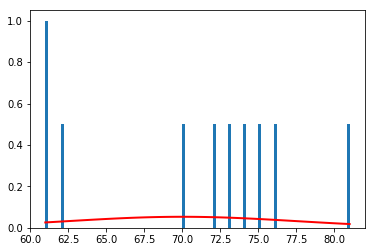

List of candidates:
	[0]61 [1]70 [2]74 [3]61 [4]75 [5]76 [6]62 [7]73 [8]72 [9]81 
Sample candidates from [0] to [3]
Best Sampling rejected candidate: [2]74
Hired candidate: [4]75
Global optimal candidates: [9]81 

In [5]:
test(10)

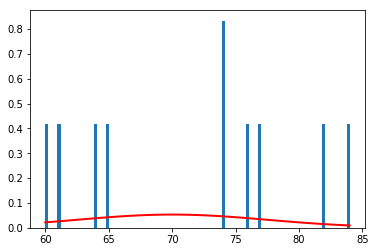

List of candidates:
	[0]74 [1]61 [2]77 [3]76 [4]64 [5]60 [6]84 [7]74 [8]82 [9]65 
Sample candidates from [0] to [3]
Best Sampling rejected candidate: [2]77
Hired candidate: [6]84
Global optimal candidates: [6]84 

In [6]:
test(10)

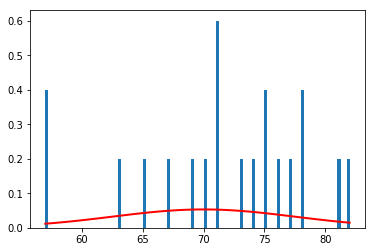

List of candidates:
	[0]81 [1]65 [2]78 [3]75 [4]78 [5]75 [6]71 [7]82 [8]57 [9]74 [10]70 [11]71 [12]67 [13]69 [14]73 [15]76 [16]71 [17]63 [18]77 [19]57 
Sample candidates from [0] to [6]
Best Sampling rejected candidate: [0]81
Hired candidate: [7]82
Global optimal candidates: [7]82 

In [7]:
test(20)

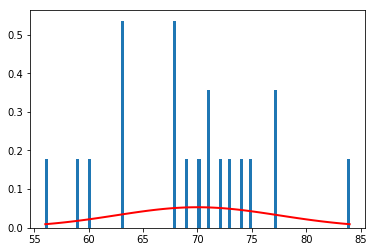

List of candidates:
	[0]59 [1]56 [2]71 [3]68 [4]77 [5]74 [6]71 [7]69 [8]77 [9]73 [10]75 [11]68 [12]68 [13]84 [14]63 [15]60 [16]63 [17]63 [18]70 [19]72 
Sample candidates from [0] to [6]
Best Sampling rejected candidate: [4]77
Hired candidate: [8]77
Global optimal candidates: [13]84 

In [8]:
test(20)

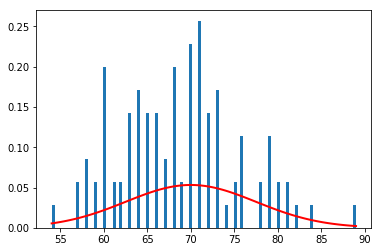

List of candidates:
	[0]57 [1]68 [2]66 [3]69 [4]70 [5]73 [6]59 [7]60 [8]73 [9]62 [10]72 [11]70 [12]72 [13]81 [14]71 [15]72 [16]66 [17]60 [18]68 [19]65 [20]66 [21]76 [22]79 [23]65 [24]71 [25]58 [26]63 [27]65 [28]79 [29]75 [30]82 [31]68 [32]70 [33]67 [34]63 [35]76 [36]70 [37]67 [38]60 [39]68 [40]64 [41]73 [42]76 [43]72 [44]72 [45]58 [46]60 [47]89 [48]66 [49]57 [50]58 [51]81 [52]80 [53]78 [54]68 [55]60 [56]70 [57]68 [58]70 [59]63 [60]61 [61]84 [62]79 [63]66 [64]71 [65]76 [66]65 [67]71 [68]61 [69]64 [70]69 [71]63 [72]64 [73]64 [74]70 [75]64 [76]73 [77]60 [78]71 [79]70 [80]71 [81]73 [82]78 [83]64 [84]71 [85]71 [86]80 [87]74 [88]60 [89]67 [90]79 [91]68 [92]54 [93]62 [94]71 [95]73 [96]63 [97]59 [98]75 [99]65 
Sample candidates from [0] to [36]
Best Sampling rejected candidate: [30]82
Hired candidate: [47]89
Global optimal candidates: [47]89 

In [9]:
test(100)

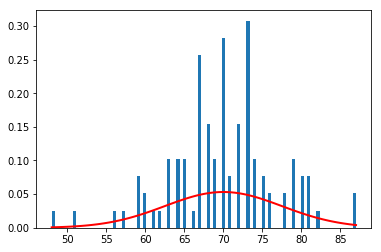

List of candidates:
	[0]70 [1]75 [2]79 [3]68 [4]68 [5]80 [6]70 [7]67 [8]71 [9]67 [10]81 [11]69 [12]70 [13]87 [14]73 [15]71 [16]70 [17]67 [18]67 [19]73 [20]64 [21]72 [22]67 [23]65 [24]63 [25]56 [26]72 [27]70 [28]76 [29]70 [30]74 [31]60 [32]82 [33]62 [34]69 [35]79 [36]75 [37]65 [38]63 [39]73 [40]64 [41]67 [42]65 [43]76 [44]73 [45]73 [46]78 [47]67 [48]73 [49]68 [50]68 [51]73 [52]61 [53]73 [54]59 [55]68 [56]73 [57]73 [58]78 [59]69 [60]59 [61]67 [62]80 [63]70 [64]64 [65]69 [66]73 [67]51 [68]71 [69]75 [70]74 [71]70 [72]74 [73]63 [74]70 [75]79 [76]73 [77]72 [78]70 [79]68 [80]79 [81]57 [82]87 [83]81 [84]67 [85]67 [86]48 [87]74 [88]70 [89]81 [90]72 [91]64 [92]66 [93]59 [94]72 [95]65 [96]60 [97]80 [98]72 [99]63 
Sample candidates from [0] to [36]
Best Sampling rejected candidate: [13]87
Hired candidate: [82]87
Global optimal candidates: [13]87 [82]87 

In [10]:
test(100)

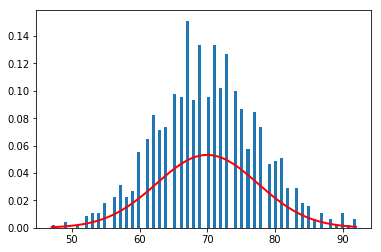

Sample candidates from [0] to [367]
Best Sampling rejected candidate: [355]92
Hired candidate: [524]92
Global optimal candidates: [355]92 [524]92 [738]92 

In [11]:
test(1000, False)

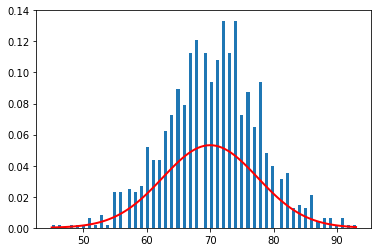

Sample candidates from [0] to [367]
Best Sampling rejected candidate: [62]92
Hired candidate: [818]93
Global optimal candidates: [818]93 

In [12]:
test(1000, False)

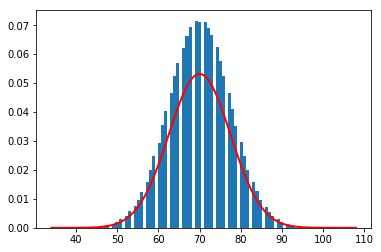

Sample candidates from [0] to [367878]
Best Sampling rejected candidate: [112590]106
Hired candidate: [636666]108
Global optimal candidates: [636666]108 

In [13]:
test(int(1e6), False)

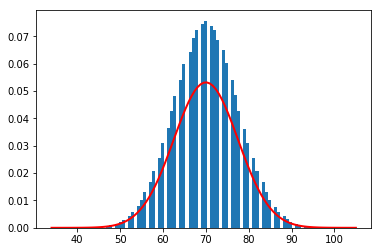

Sample candidates from [0] to [367878]
Best Sampling rejected candidate: [230823]105
Cant hire
Global optimal candidates: [230823]105 

In [14]:
test(int(1e6), False)